## Compare K-Means and Hierarchical Clustering

Load Iris dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

Perform K-Means clustering (k = 3).

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=99)
km_labels = kmeans.fit_predict(X)

Perform Agglomerative Hierarchical Clustering

In [3]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage="single")
agg_labels = agg.fit_predict(X)

In [4]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np

def align_labels(true, pred):
    cm = confusion_matrix(true, pred)
    row_ind, col_ind = linear_sum_assignment(-cm)
    mapping = {col: row for row, col in zip(row_ind, col_ind)}
    return np.array([mapping[label] for label in pred])

km_aligned = align_labels(y, km_labels)
agg_aligned = align_labels(y, agg_labels)

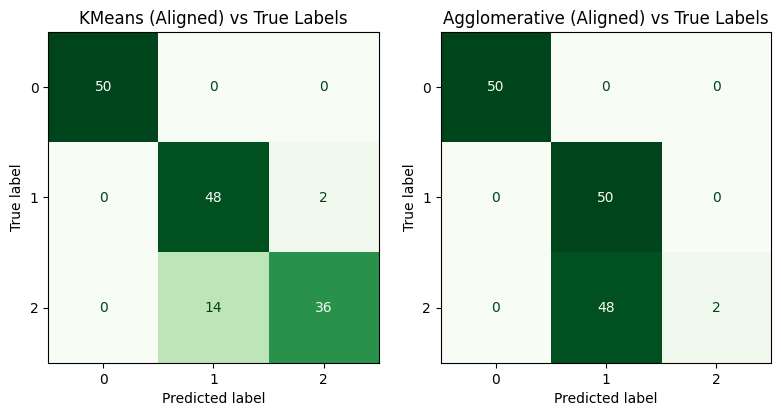

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

ConfusionMatrixDisplay.from_predictions(
    y, km_aligned, ax=axes[0], colorbar=False, cmap="Greens"
)
axes[0].set_title("KMeans (Aligned) vs True Labels")

ConfusionMatrixDisplay.from_predictions(
    y, agg_aligned, ax=axes[1], colorbar=False, cmap="Greens"
)
axes[1].set_title("Agglomerative (Aligned) vs True Labels")

plt.tight_layout()
plt.show()

K-Means outperforms Agglomerative

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

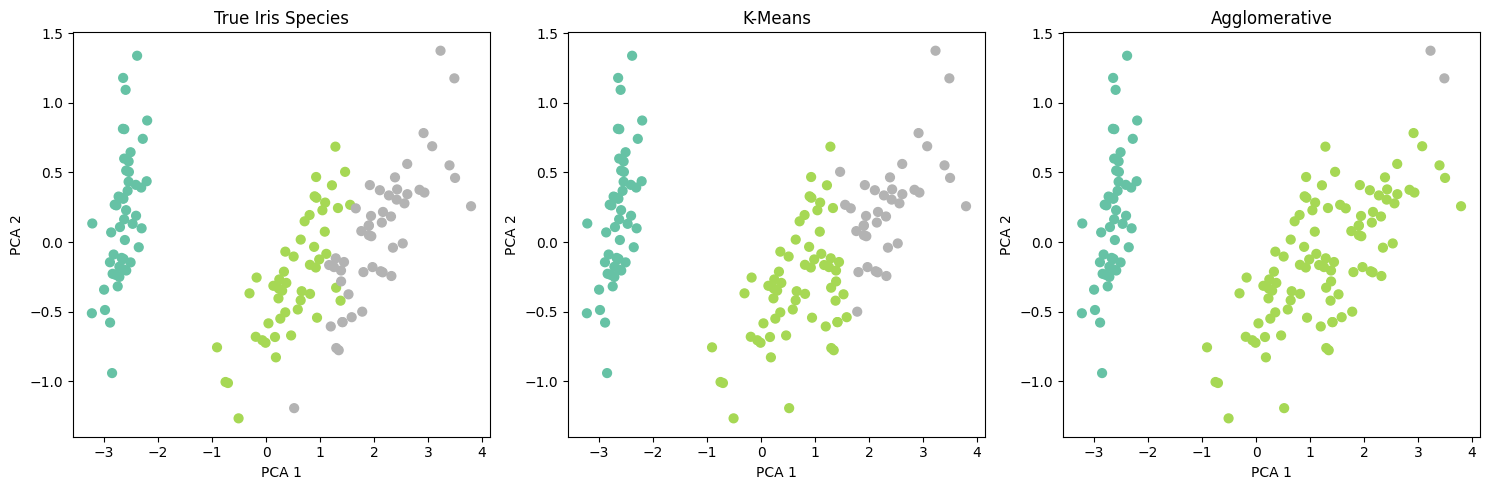

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cmap = "Set2"

# True Labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, s=40)
axes[0].set_title("True Iris Species")

# K-Means (Aligned)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=km_aligned, cmap=cmap, s=40)
axes[1].set_title("K-Means")

# Agglomerative (Aligned)
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=agg_aligned, cmap=cmap, s=40)
axes[2].set_title("Agglomerative")

for ax in axes:
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

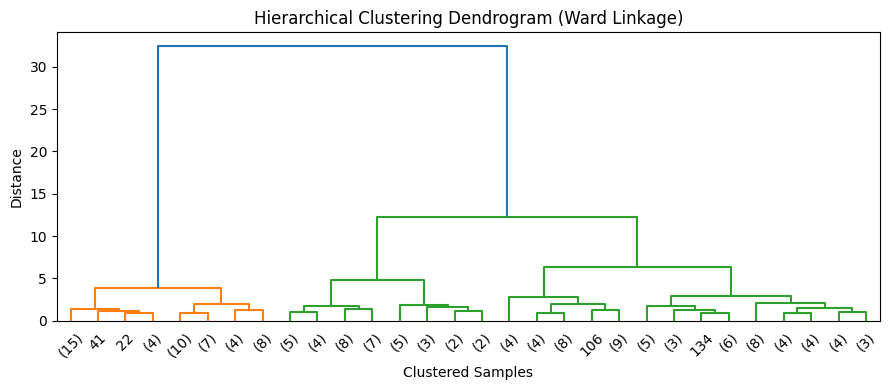

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(X, method="ward")

plt.figure(figsize=(9, 4))
dendrogram(
    Z,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=45,
    leaf_font_size=10,
)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Clustered Samples")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()